In [1]:
import python_inventory as pyinv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X0 = np.random.random((30,2))
X0[:,0] += 1
X0[:,1] += 1 
Y0 = np.ones(30, 'd')
X1 = np.random.random((30,2))
Y1 = -np.ones(30, 'd')
X = np.vstack((X0,X1))
Y = np.hstack((Y0,Y1))

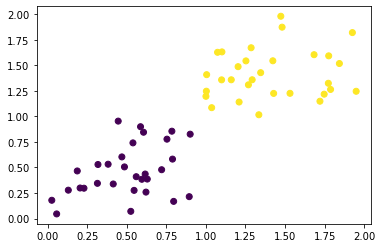

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [4]:
body = pyinv.NN()
models = []
for j in range(7):
    mod = pyinv.SigmaNeuronModel(pyinv.Sigmoidal(), 2)
    models.append(mod)
layer = pyinv.FuncLayer(models)
body.add(layer)

head = pyinv.LinearModel(7)

nn = pyinv.ModelNN(head, body)

nn.init_param()

In [5]:
loss_hinge = pyinv.MarginLoss(pyinv.Hinge())
am = pyinv.ArithMean()
risk = pyinv.Risk(nn, loss_hinge, am)

gd = pyinv.GradientDescent(risk, h=0.1)

1000 [-2.37512884 -0.43183299  0.66898027 -0.29725205  1.05956362  1.19800152
 -2.76865904  3.67201625  0.87786855  0.40939432  0.35106299 -0.19905352
  0.64256406  0.75413129  0.59761616  0.86139875  0.97917296 -0.55442576
  0.5925597   0.96711953 -0.75828544  0.53433678  1.05123582  1.7354776
 -1.33977024 -0.96881895 -2.97666275  1.6291414   1.79784301]


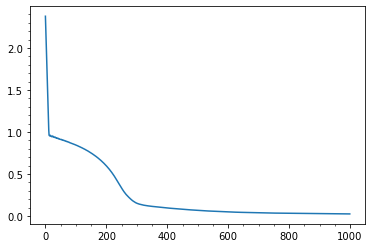

In [6]:
gd.fit(X, Y)
print(gd.K, nn.param)

plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

In [19]:
xrange = np.linspace(0, 2, 100)
yrange = np.linspace(0, 2, 100)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[XX.ravel(), YY.ravel()]
ZZ = nn.evaluate_all(XY)
ZZ = ZZ.reshape(XX.shape)
print(ZZ)

[[-3.97747304 -3.9561848  -3.93451238 ...  0.08589122  0.13788429
   0.18956162]
 [-3.95335913 -3.93170238 -3.90965591 ...  0.14189742  0.19359764
   0.24496286]
 [-3.92886257 -3.90683196 -3.88440604 ...  0.197609    0.24899537
   0.30002793]
 ...
 [ 0.35124977  0.40263432  0.45368244 ...  3.05630093  3.0651837
   3.07386568]
 [ 0.40403974  0.45505055  0.50570775 ...  3.06601543  3.07469967
   3.08318753]
 [ 0.45639318  0.50701315  0.55726298 ...  3.07551348  3.08400369
   3.09230187]]


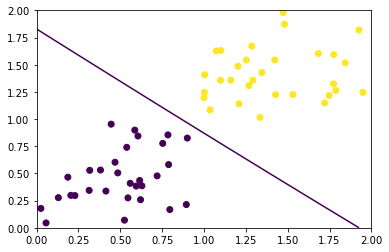

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.contour(ZZ, levels=[ 0.], extent=(0,2,0,2))
plt.show()

In [9]:
nn.param

array([-2.37512884, -0.43183299,  0.66898027, -0.29725205,  1.05956362,
        1.19800152, -2.76865904,  3.67201625,  0.87786855,  0.40939432,
        0.35106299, -0.19905352,  0.64256406,  0.75413129,  0.59761616,
        0.86139875,  0.97917296, -0.55442576,  0.5925597 ,  0.96711953,
       -0.75828544,  0.53433678,  1.05123582,  1.7354776 , -1.33977024,
       -0.96881895, -2.97666275,  1.6291414 ,  1.79784301])